# 1. Instalations nand Imports

In [1]:
# !pip install missingno
# !pip install catboost

In [2]:
# Imports
import pandas as pd
import numpy as np

import missingno
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

sns.set(rc={'figure.figsize':(11.7,8.27)})

# 2. Import and read data frames

In [3]:
data = pd.read_csv("titanic_data/train.csv")
test = pd.read_csv("titanic_data/test.csv")
gs = pd.read_csv("titanic_data/gender_submission.csv")


print("Data:", data.shape)
print("Test:", test.shape)
print("Gender Submision:", gs.shape)

Data: (891, 12)
Test: (418, 11)
Gender Submision: (418, 2)


# 3. Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

* Survived: 0 = Did not survive, 1 = Survived
* Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.
* Sex: Male or female
* Age: Age in years, fractional if less than 1
* SibSp: Number of siblings or spouses aboard the titanic
* Parch: Number of parents or children aboard the titanic
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# data frames informations
data.info()
print('='*60)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [5]:
# Missing data in data by columns
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [6]:
# Missing data in test by columns
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

<AxesSubplot:>

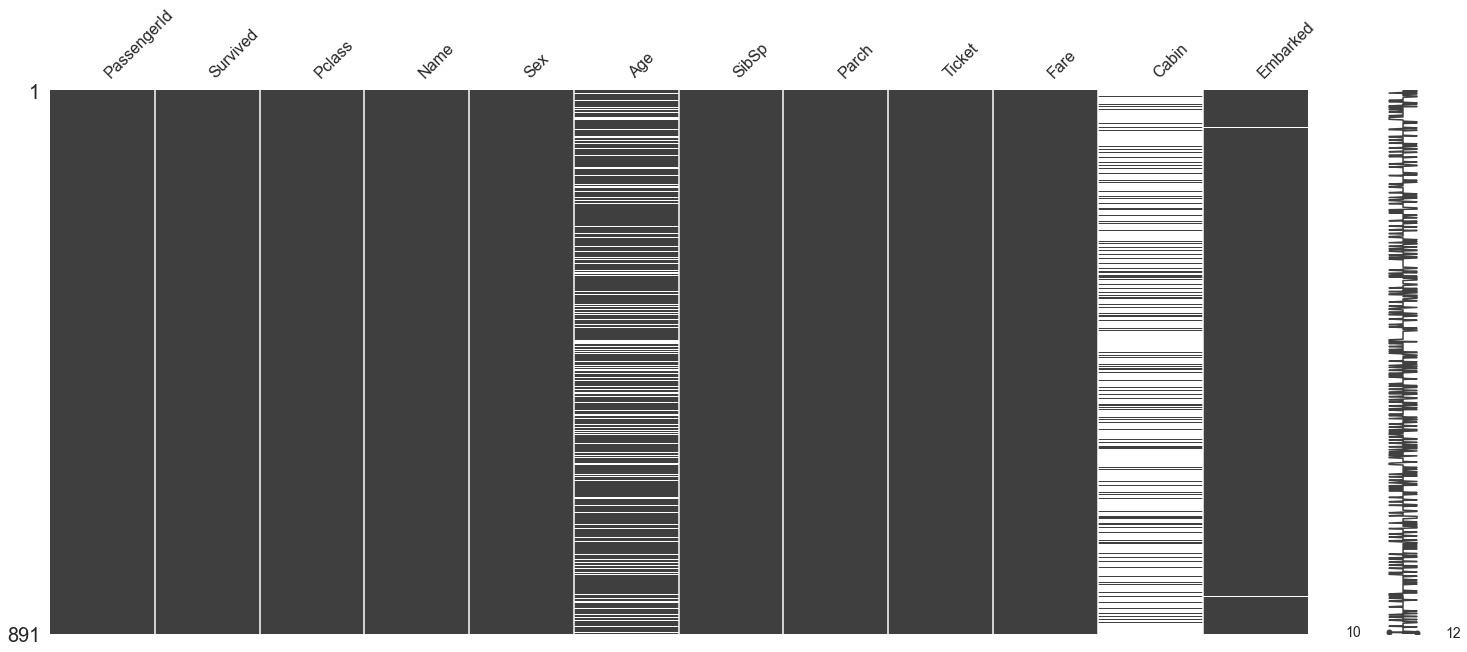

In [7]:
#Missing data in data set - visualisation
missingno.matrix(data)

<AxesSubplot:>

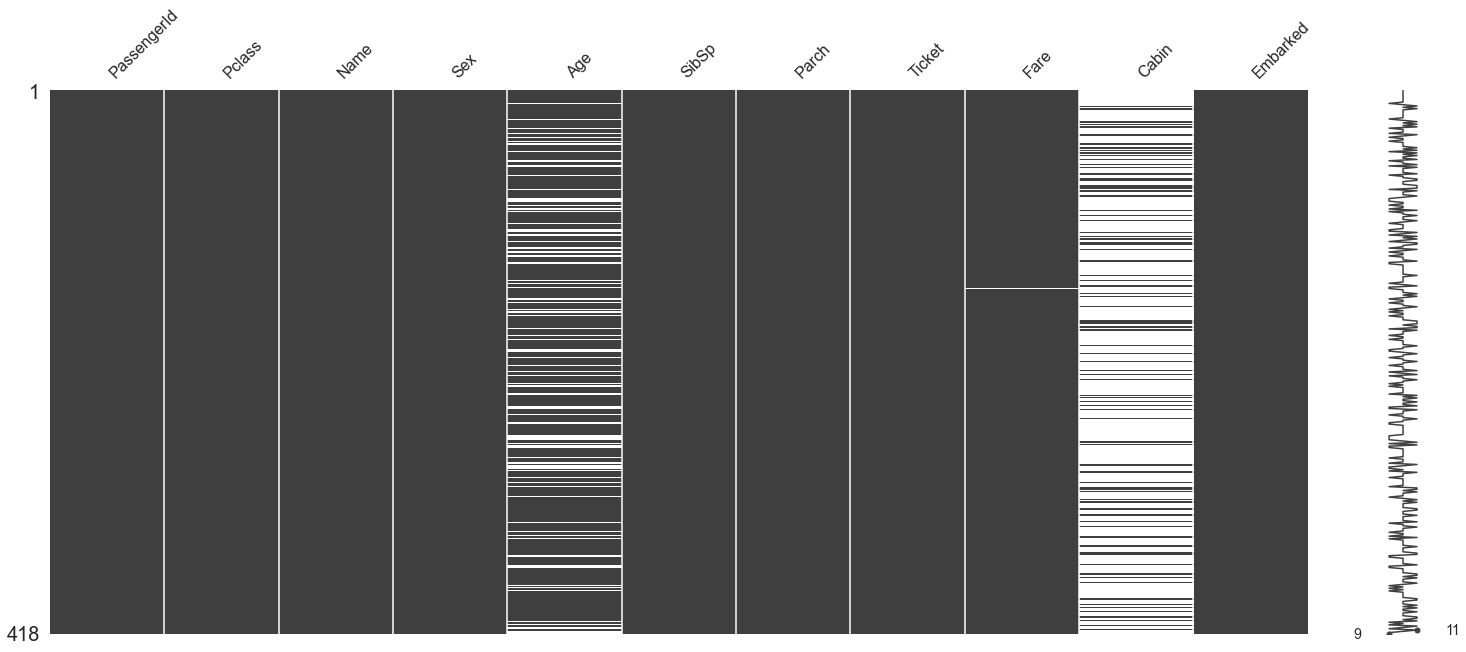

In [8]:
#Missing data in data set - visualisation
missingno.matrix(test)

In [9]:
# Sumary statistics for data set
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Sumary statistics for test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Analysis

CATEGORICAL VARIABLES: Sex

Sex column variable counts
male      577
female    314
Name: Sex, dtype: int64



Mean of survived female and male
      Sex  Survived
0  female  0.742038
1    male  0.188908





Text(0, 0.5, 'Survival probability')

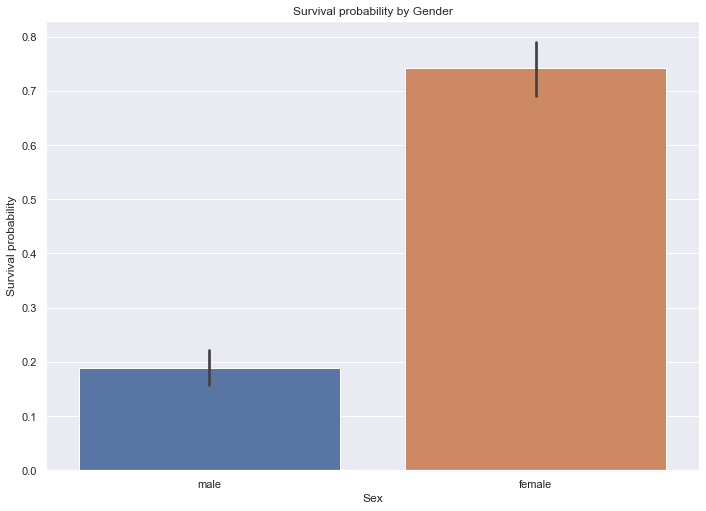

In [11]:
# categorical variable: Sex
print("CATEGORICAL VARIABLES: Sex\n")
# value counts of the sex column
print('Sex column variable counts')
print(data["Sex"]. value_counts(dropna=False))
# NOTE: There are more male passengers then female passengers on Titanic
print('\n\n')

#Mean of survivals by sex
print('Mean of survived female and male')
print(data[["Sex", "Survived"]].groupby('Sex', as_index = False).mean().sort_values(by="Survived", ascending=False))
print('\n\n')

# Visualisation on bar chart
sns.barplot(x='Sex', y="Survived", data=data)
plt.title("Survival probability by Gender")
plt.ylabel("Survival probability")


CATEGORICAL VARIABLES: Pclass

Pclass column variable counts
3    491
1    216
2    184
Name: Pclass, dtype: int64



Mean of survived Passenger Class
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363





Text(0, 0.5, 'Survival probability')

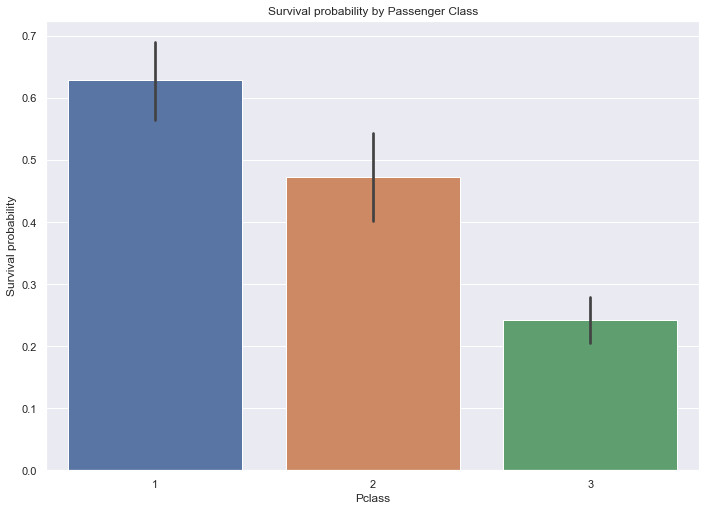

In [12]:
# categorical variable: Pclass
print("CATEGORICAL VARIABLES: Pclass\n")
# value counts of the Pclass column
print('Pclass column variable counts')
print(data["Pclass"]. value_counts(dropna=False))
print('\n\n')

#Mean of survivals by passanger class
print('Mean of survived Passenger Class')
print(data[["Pclass", "Survived"]].groupby('Pclass', as_index = False).mean().sort_values(by="Survived", ascending=False))
print('\n\n')

# Visualisation on bar chart
sns.barplot(x='Pclass', y="Survived", data=data)
plt.title("Survival probability by Passenger Class")
plt.ylabel("Survival probability")


Visualisation survival by gender and passanger class



/home/nika/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(33.47468333333334, 0.5, 'Survival probability')

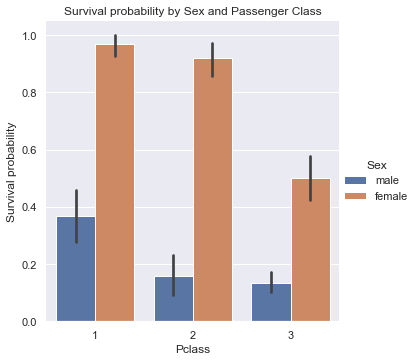

In [13]:
# categorical variable: Pclass and Sex
print("Visualisation survival by gender and passanger class\n")

# Visualisation on bar chart
vis = sns.factorplot(x='Pclass', y="Survived", hue='Sex', kind = 'bar', data=data)
vis.despine(left=True)
plt.title("Survival probability by Sex and Passenger Class")
plt.ylabel("Survival probability")


CATEGORICAL VARIABLES: Embarked

Embarked column variable counts
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64



Mean of survived Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957





Text(0, 0.5, 'Survival probability')

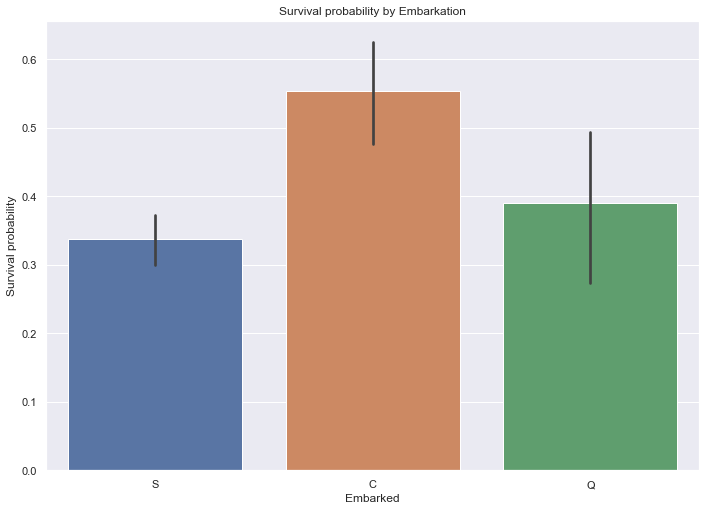

In [14]:
# categorical variable: Embarked
print("CATEGORICAL VARIABLES: Embarked\n")
# value counts of the Pclass column
print('Embarked column variable counts')
print(data["Embarked"]. value_counts(dropna=False))
print('\n\n')

#Mean of survivals by passanger class
print('Mean of survived Embarked')
print(data[["Embarked", "Survived"]].groupby('Embarked', as_index = False).mean().sort_values(by="Survived", ascending=False))
print('\n\n')

# Visualisation on bar chart
sns.barplot(x='Embarked', y="Survived", data=data)
plt.title("Survival probability by Embarkation")
plt.ylabel("Survival probability")


#### Hypithesis
The majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having highest survival probability.
Or Alternativly: they could have been more third class passangers that embarked from location S and because they have lowest survival probability, this has caused location S to have the lowest survival probability.


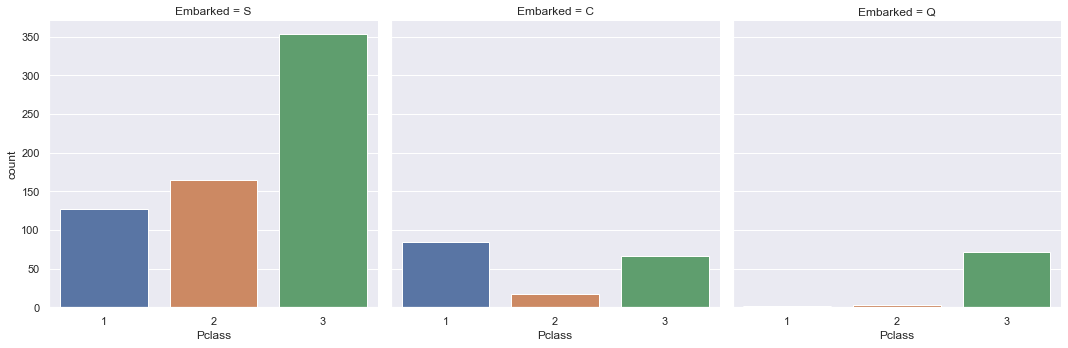

In [15]:
sns.catplot(x="Pclass", col='Embarked', data=data, kind='count')

# NOTE: the hypotesis appears to be true. Location S has the most third class passangers whereas location C has the most first class passangers

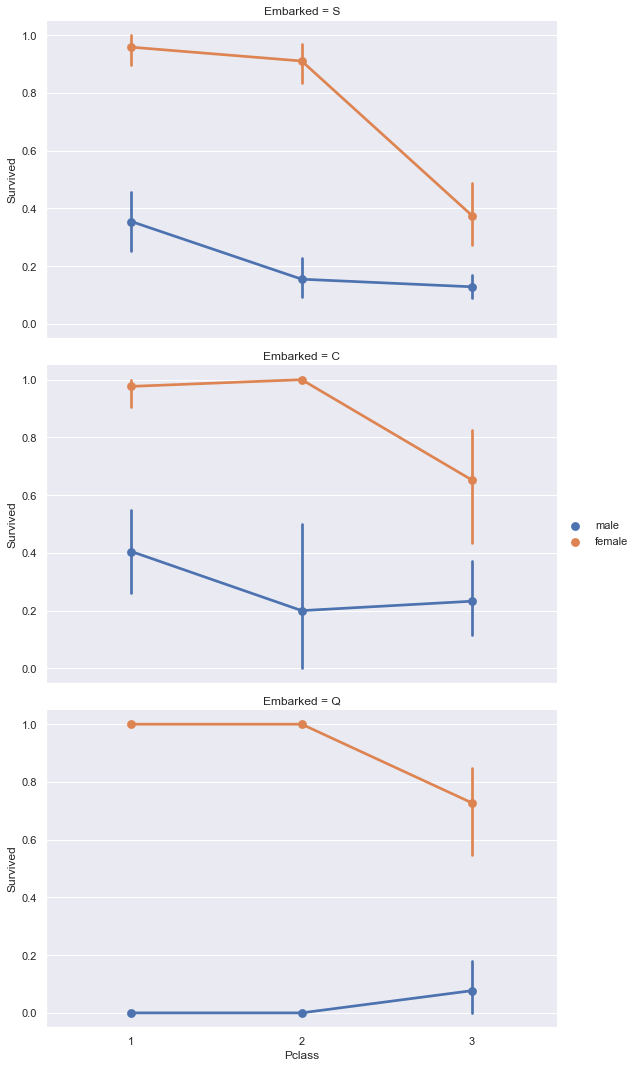

In [16]:
# Survival probability by all categorical variables
grid = sns.FacetGrid(data, row = 'Embarked', height = 5, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1,2,3], hue_order=["male", "female"], palette = 'deep')
grid.add_legend()

## Numerical Variables

In [17]:
# Remove outliners functions

def detect_outliers(df, n, features):
    """
    :param df: data frame
    :param n: number of repeat in the outlier list
    :param features: numerical variable from data frame
    
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """

    # create empty list
    outlier_indices = []
    # find outliners for each features
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices= Counter(outlier_indices)
    multiple_outliners = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliners
    
to_drop = detect_outliers(data, 2, ["Age", 'SibSp', 'Parch', 'Fare'])
print(f"We will drop there {len(to_drop)} indices: {to_drop}")


We will drop there 10 indices: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [18]:
# Remove outliners
print(f"Before {len(data)} rows.")
data = data.drop(to_drop, axis=0).reset_index(drop=True)
print(f"After {len(data)} rows.")

Before 891 rows.
After 881 rows.


In [19]:
# Corelation numerical varaibles with survival
correlation = data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr()
correlation

,Survived,SibSp,Parch,Age,Fare
Survived,1.000000,0.003330,0.092819,-0.076867,0.264613
SibSp,0.003330,1.000000,0.379281,-0.307129,0.110072
Parch,0.092819,0.379281,1.000000,-0.186457,0.183801
Age,-0.076867,-0.307129,-0.186457,1.000000,0.110219
Fare,0.264613,0.110072,0.183801,0.110219,1.000000


<AxesSubplot:>

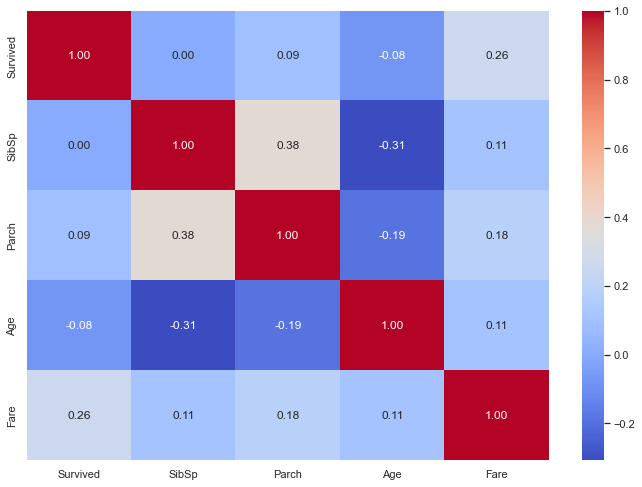

In [20]:
# Correlation visualisation
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')

NUMERICAL VARIABLES: SibSp

SibSp column variable counts
0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64



Mean of survived SibSp
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
4      4  0.166667
3      3  0.153846
5      5  0.000000





Text(0, 0.5, 'Survival probability')

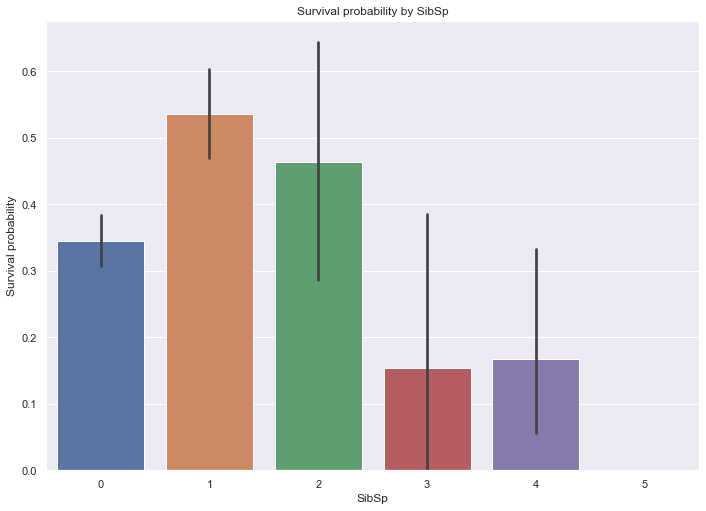

In [21]:
# Numerical variable: SibSp
print("NUMERICAL VARIABLES: SibSp\n")

# value counts of the SibSp column
print('SibSp column variable counts')
print(data["SibSp"]. value_counts(dropna=False))
print('\n\n')

#Mean of survivals by passanger class
print('Mean of survived SibSp')
print(data[["SibSp", "Survived"]].groupby('SibSp', as_index = False).mean().sort_values(by="Survived", ascending=False))
print('\n\n')

# Visualisation on bar chart
sns.barplot(x='SibSp', y="Survived", data=data)
plt.title("Survival probability by SibSp")
plt.ylabel("Survival probability")


NUMERICAL VARIABLES: Parch

Parch column variable counts
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



Mean of survived by Parch
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.542857
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000





Text(0, 0.5, 'Survival probability')

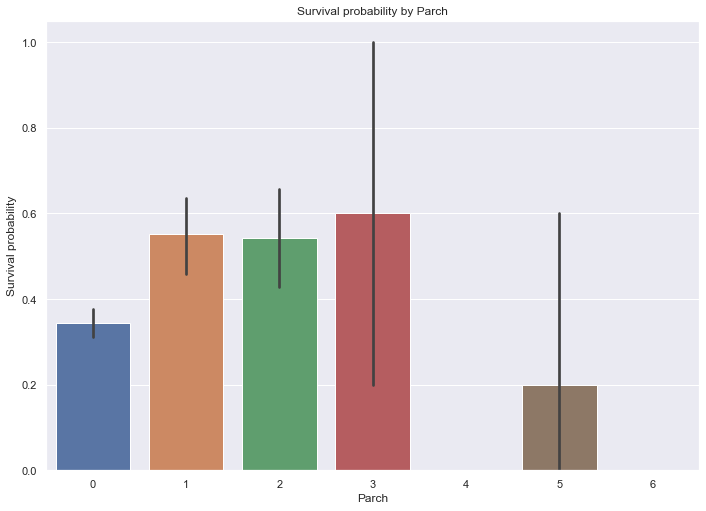

In [22]:
# Numerical variable: Parch
print("NUMERICAL VARIABLES: Parch\n")

# value counts of the Parch column
print('Parch column variable counts')
print(data["Parch"]. value_counts(dropna=False))
print('\n\n')

#Mean of survivals by passanger class
print('Mean of survived by Parch')
print(data[["Parch", "Survived"]].groupby('Parch', as_index = False).mean().sort_values(by="Survived", ascending=False))
print('\n\n')

# Visualisation on bar chart
sns.barplot(x='Parch', y="Survived", data=data)
plt.title("Survival probability by Parch")
plt.ylabel("Survival probability")


NUMERICAL VARIABLES: Age

Age column variable NaN
170





Text(0.5, 1.0, 'Passenger Age Distibution')

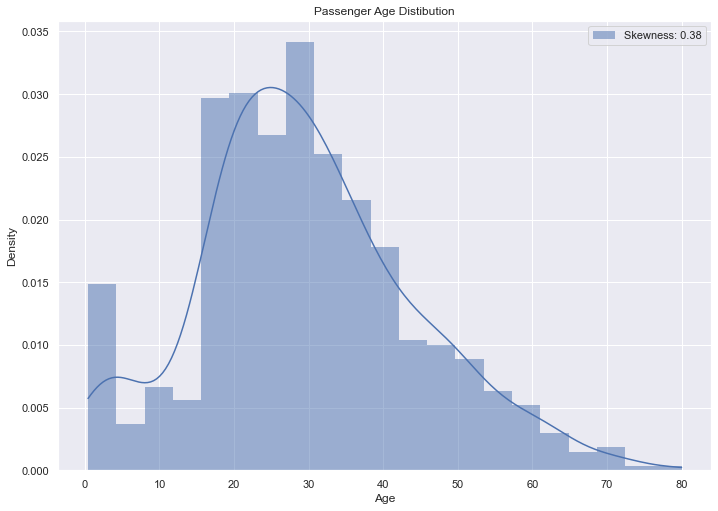

In [23]:
# Numerical variable: Age
print("NUMERICAL VARIABLES: Age\n")

# value counts of the Age column
print('Age column variable NaN')
print(data["Age"].isnull().sum())
print('\n\n')

# Passenger Age distribution
sns.histplot(data['Age'], label = f"Skewness: {data['Age'].skew():.2f}", kde=True, stat="density", linewidth=0)
plt.legend(loc="best")
plt.title("Passenger Age Distibution")


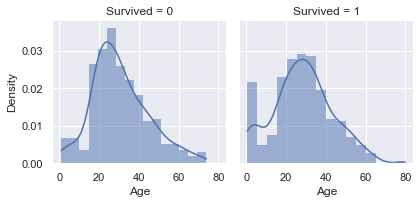

In [24]:
# Age distribution by survival

g = sns.FacetGrid(data, col="Survived")
g.map(sns.histplot, "Age", kde=True, stat="density", linewidth=0)

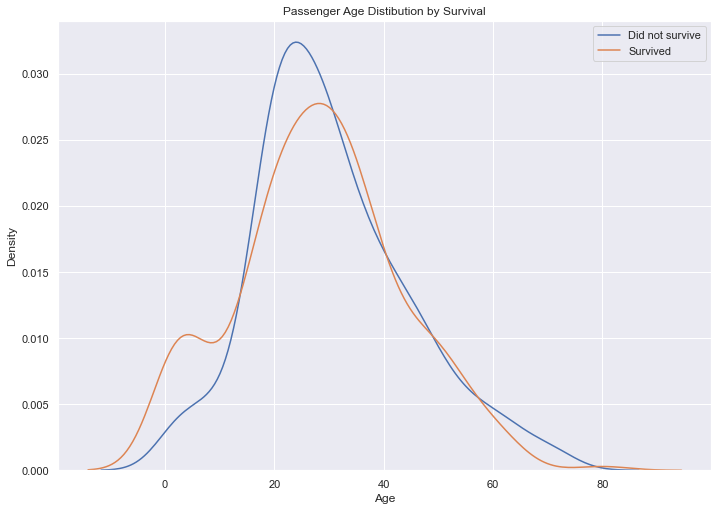

In [25]:
# Age distributions by survived

sns.kdeplot(data["Age"][data["Survived"]==0], label = "Did not survive")
sns.kdeplot(data["Age"][data["Survived"]==1], label = "Survived")
plt.xlabel("Age")
plt.title("Passenger Age Distibution by Survival")
plt.legend()


NUMERICAL VARIABLES: Fare

Fare column variable NaN
0





Text(0, 0.5, 'Passenger Fare Distibution')

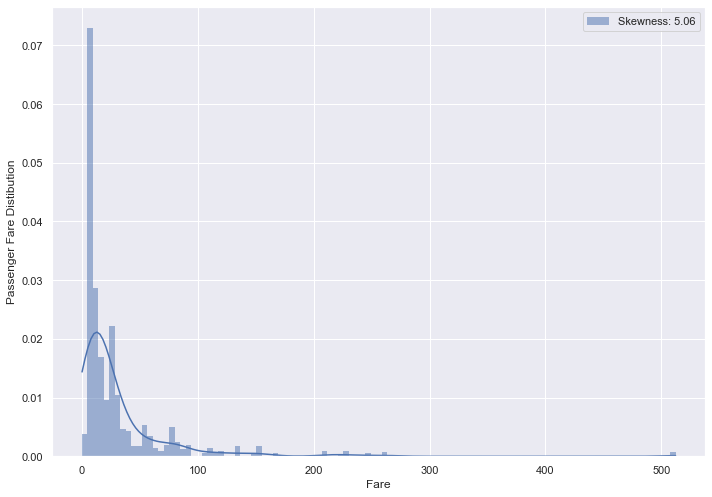

In [26]:
# Numerical variable: Fare
print("NUMERICAL VARIABLES: Fare\n")

# value counts of the Fare column
print('Fare column variable NaN')
print(data["Fare"].isnull().sum())
print('\n\n')

# Passenger fare distribution
sns.histplot(data['Fare'], label = f"Skewness: {data['Fare'].skew():.2f}", kde=True, stat="density", linewidth=0)
plt.legend(loc="best")
plt.ylabel("Passenger Fare Distibution")




# 5.  Data preprocessing

* Drop and fill missing values
* Data transformation (log transgormation)
* Feature engineering
* Feature encoding

### Drop and fill missing values

In [27]:
# Drop Tiket and Cabin column from data and test set
data = data.drop(["Ticket", "Cabin"], axis=1)
test = test.drop(["Ticket", "Cabin"], axis=1)

In [28]:
# Missing values in data set
data.isnull().sum().sort_values(ascending=False)

Age            170
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [29]:
# Compute the most frequent value of Embarked in data set
mode = data["Embarked"].dropna().mode()[0]
mode

'S'

In [30]:
# Fill missing values for Embarked with mode for data det
data['Embarked'].fillna(mode, inplace = True)

In [31]:
# Missing values in data set
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

In [32]:
# Compute the median of Fare in test set
median = test["Fare"].dropna().median()
median

14.4542

In [33]:
# Fill missing values for Embarked with mode for data det
test['Fare'].fillna(median, inplace = True)

#### COMBINE data and test set

In [34]:
combine = pd.concat([data, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [35]:
combine.isnull().sum().sort_values(ascending = False)
# NOTE: we ignore missing values in Survive atribute

# NOTE: We need to fill missing values in the Age column
# We will use the most correlated with Age to predict values for Age

Survived       418
Age            256
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [36]:
# convert Sex into numerical variable: male = 0, female = 1
combine['Sex'] = combine["Sex"].map({'male': 0, "female": 1})
combine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,8.0500,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,S
1297,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,8.0500,S


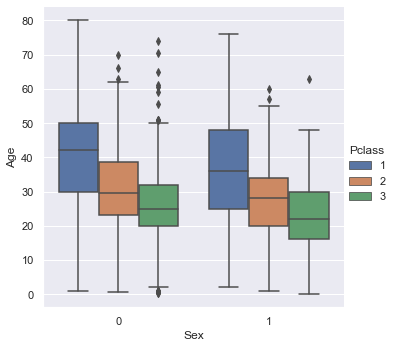

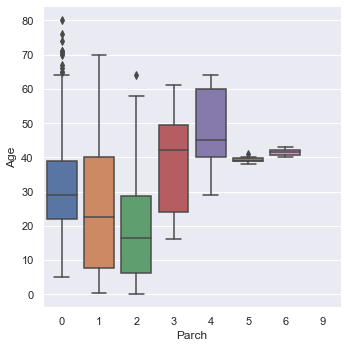

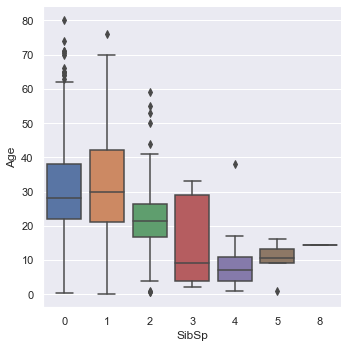

In [37]:
sns.catplot(y="Age", x="Sex", hue = 'Pclass', kind = "box", data = combine)
sns.catplot(y="Age", x="Parch", kind = "box", data = combine)
sns.catplot(y="Age", x="SibSp", kind = "box", data = combine)

<AxesSubplot:>

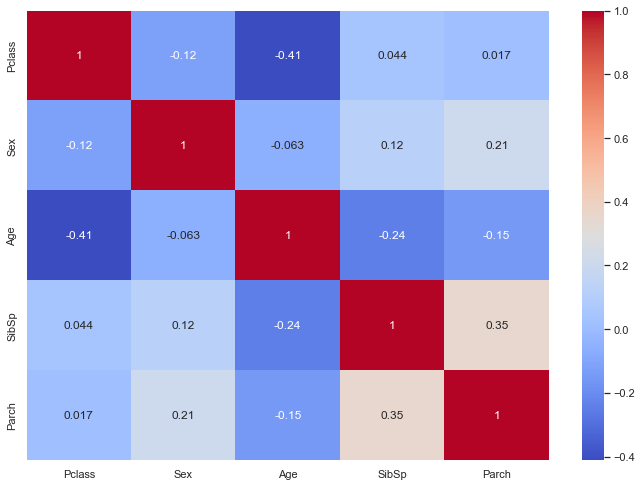

In [38]:
sns.heatmap(combine.drop(["Survived", "Name", "PassengerId", "Fare"], axis = 1).corr(), annot = True, cmap = 'coolwarm') 

In [39]:
# Age is not correlated with Sex, but is negativly correlated with SubSp, Pclass and Parch

# Get indices of missing Age values
age_nan_indices = list(combine[combine["Age"].isnull()].index)
len(age_nan_indices)

256

In [40]:
# Fill missing values - loop trpugh list

for index in age_nan_indices:
    median_age = combine["Age"].median()
    predict_age = combine["Age"][(combine['SibSp'] == combine.iloc[index]['SibSp'])
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        combine["Age"].iloc[index] = median_age
    else:
        combine["Age"].iloc[index] = predict_age
        

/home/nika/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nika/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nika/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

/home/nika/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nika/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nika/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [41]:
# Check if still exists some missing value for Age

combine["Age"].isnull().sum()

0

### Data transformation

Text(0.5, 1.0, 'Passanger Fare Distribution')

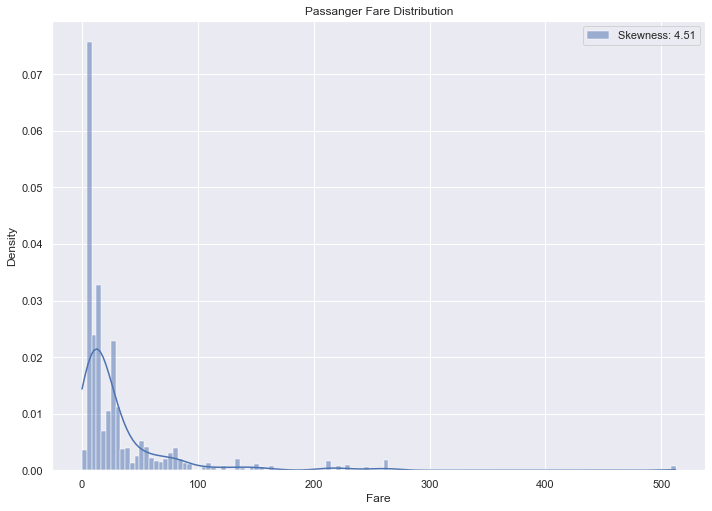

In [42]:
# Passanger Fare distribution

sns.histplot(combine['Fare'], label = f'Skewness: {combine["Fare"].skew():.2f}', kde=True, stat="density")
plt.legend(loc="best")
plt.title("Passanger Fare Distribution")

In [43]:
combine['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1294      8.0500
1295    108.9000
1296      7.2500
1297      8.0500
1298     22.3583
Name: Fare, Length: 1299, dtype: float64

In [44]:
# Apply log transofrmation to Fare column to reduce skewness
combine["Fare"] = combine["Fare"].map(lambda x: np.log(x) if x>0 else 0)

In [45]:
combine['Fare']

0       1.981001
1       4.266662
2       2.070022
3       3.972177
4       2.085672
          ...   
1294    2.085672
1295    4.690430
1296    1.981001
1297    2.085672
1298    3.107198
Name: Fare, Length: 1299, dtype: float64

Text(0.5, 1.0, 'Passanger Fare Distribution')

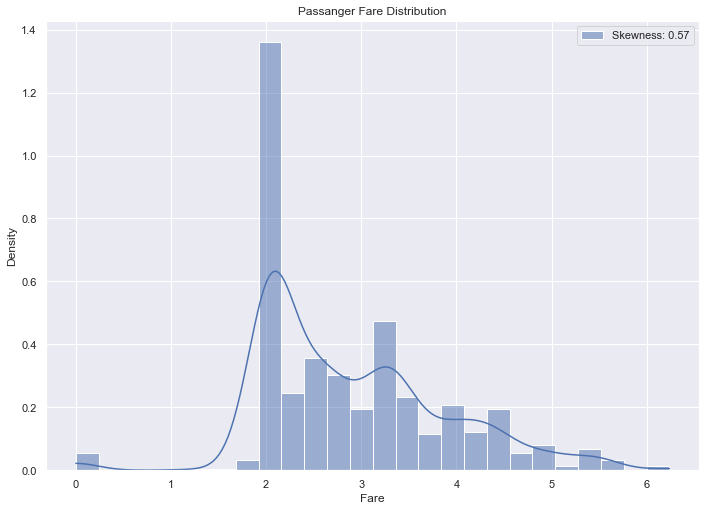

In [46]:
# Passanger fare distribution after log transofrmation

sns.histplot(combine['Fare'], label = f'Skewness: {combine["Fare"].skew():.2f}', kde=True, stat="density")
plt.legend(loc="best")
plt.title("Passanger Fare Distribution")

# Feature engineering
In machine learning process create new features to better represent the underlying problem to the predictive models.

Create new features:
* Title
* IsAlone
* Age*Class

In [47]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


### Title

In [48]:
# Get passenger title

combine["Title"] = [name.split(',')[1].split(".")[0].strip() for name in combine["Name"]]
combine[["Name", "Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [49]:
combine["Title"].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Mme               1
Don               1
Sir               1
the Countess      1
Lady              1
Dona              1
Capt              1
Name: Title, dtype: int64

In [50]:
combine["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [51]:
combine['Title'] = combine['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Ms', 'Mlle'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

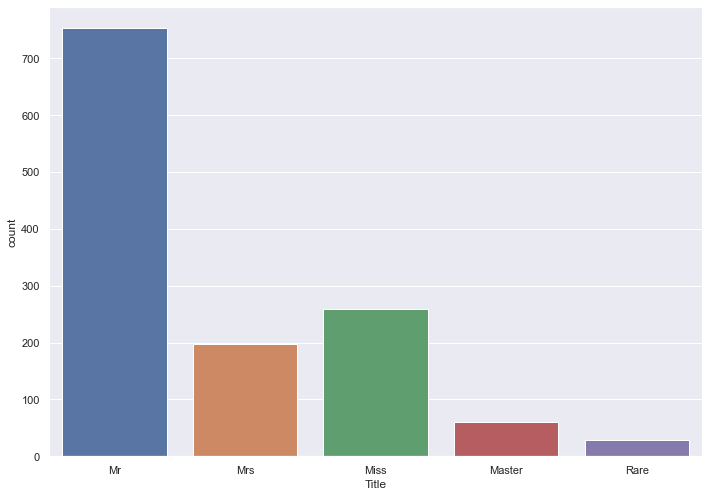

In [52]:
sns.countplot(x = 'Title', data=combine)

In [53]:
# Mean of survival y name title


combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by='Survived', ascending = False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


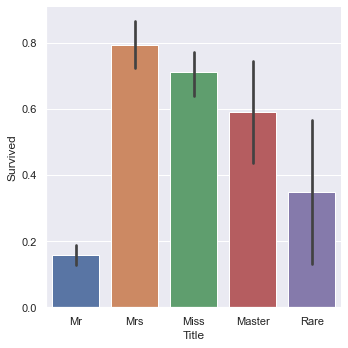

In [54]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')

In [55]:
# Drop Name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


### IsAlone

In [56]:
# Calcutate famili size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [57]:
# Mean of survival by family size


combine[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived', ascending = False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [58]:
# Create is alone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [59]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean().sort_values(by='Survived', ascending = False)


,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [60]:
# Drop SibSp, Parch, FamilySize fatures from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


### Age* Class

In [61]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
print(combine['AgeBand'].value_counts())
combine[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by='AgeBand')


(16.136, 32.102]    724
(32.102, 48.068]    308
(0.0902, 16.136]    148
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: AgeBand, dtype: int64


,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [62]:
# Assing ordinal to each age band
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034, 'Age'] = 4

In [63]:
#Check if exist only ordinals values for Age feature
combine['Age'].value_counts()

1.0    724
2.0    308
0.0    148
3.0    106
4.0     13
Name: Age, dtype: int64

In [64]:
# Drop AgeBand column

combine = combine.drop('AgeBand', axis = 1)

In [65]:
# Age and Pclass data types

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [66]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [67]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass','Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


# Feature encoding

Encoding in Machine learnincg models is changing all of categorical data to numerical data 

In [68]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [69]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [70]:
# Create fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
print(combine['FareBand'].value_counts())
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by='FareBand')


(1.56, 3.119]       778
(3.119, 4.679]      424
(4.679, 6.239]       78
(-0.00624, 1.56]     19
Name: FareBand, dtype: int64


,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [71]:
# Assing ordinal to each fare band
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [72]:
combine['Fare'] = combine['Fare'].astype('int')

In [73]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [74]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [75]:
# Separate training and test set from the combined dataframe

train = combine[:len(data)]
test = combine[len(data):]

In [76]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [77]:
# Drop PassengerId column from training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [78]:
# Convert Survied to integer in trainign set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [79]:
# Drop Survived column from test set
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


#  6. Modelling

Library scikit-learn, in this project I will use:
* Logistic regression
* Support vector machines -  Multi-class classification, SVC
* K-nearest neighbours
* Gaussian naive bayes
* Perceptron
* Linear SVC - Multi-class classification¶
* Stochastic gradient descent - SGD
* Decision tree
* Random forest
* CatBoost

## Split training data

Split training data into indenepend variables or predictor variables as X, and as well as dependent variable or response variavle as Y.

Y_train is the survived column in our training set
X_train is the other columns in the training set excluding the Survived column. 

Models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [80]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## Fit model to data and make predictions

1. instantite the model
2. fit the model to training set
3. predict the data in test set

### Logistic regression

linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

80.93

### Support vector machines -  Multi-class classification, SVC

SCV implement the “one-versus-one” approach for multi-class classification. 

In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 

In [82]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.09

### K-nearest neighbours

provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

n_neighbors by default is 5

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.79

### Gaussian naive bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

The likelihood of the features is assumed to be Gaussian.

In [84]:
gaussnb = GaussianNB()
gaussnb.fit(X_train, Y_train)
Y_pred = gaussnb.predict(X_test)
acc_gaussnb = round(gaussnb.score(X_train, Y_train)*100, 2)
acc_gaussnb

79.11

### Perceptron

Algorithm suitable for large scale learning. By default:
* It does not require a learning rate.
* It is not regularized (penalized).
* It updates its model only on mistakes.

Perceptrion is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [85]:
per = Perceptron()
per.fit(X_train, Y_train)
Y_pred = per.predict(X_test)
acc_per = round(per.score(X_train, Y_train)*100, 2)
acc_per

79.57

### Linear SVC - Multi-class classification¶

LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models

In [86]:
linear_svc = LinearSVC( max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)
acc_linear_svc

80.25

### Stochastic gradient descent - SGD

The advantages of Stochastic Gradient Descent are:
* Efficiency.
* Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
* SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
* SGD is sensitive to feature scaling.




In [87]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

76.73

### Decision tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:
* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:
* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



85.7


[Text(347.46943359375, 430.82564999999994, 'X[8] <= 0.5\ngini = 0.474\nsamples = 881\nvalue = [541, 340]'),
 Text(182.94181295955883, 393.36254999999994, 'X[0] <= 2.5\ngini = 0.417\nsamples = 368\nvalue = [109, 259]'),
 Text(103.80954044117648, 355.89944999999994, 'X[10] <= 0.5\ngini = 0.211\nsamples = 200\nvalue = [24, 176]'),
 Text(54.00496323529412, 318.43634999999995, 'X[3] <= 1.5\ngini = 0.097\nsamples = 177\nvalue = [9, 168]'),
 Text(24.002205882352943, 280.97324999999995, 'X[5] <= 5.0\ngini = 0.176\nsamples = 41\nvalue = [4, 37]'),
 Text(14.401323529411766, 243.51014999999995, 'X[13] <= 0.5\ngini = 0.149\nsamples = 37\nvalue = [3, 34]'),
 Text(9.600882352941177, 206.04704999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(19.201764705882354, 206.04704999999998, 'X[5] <= 1.0\ngini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(14.401323529411766, 168.58394999999996, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(24.002205882352943, 168.58394999999996, 'X[4] <= 0.5\ngi

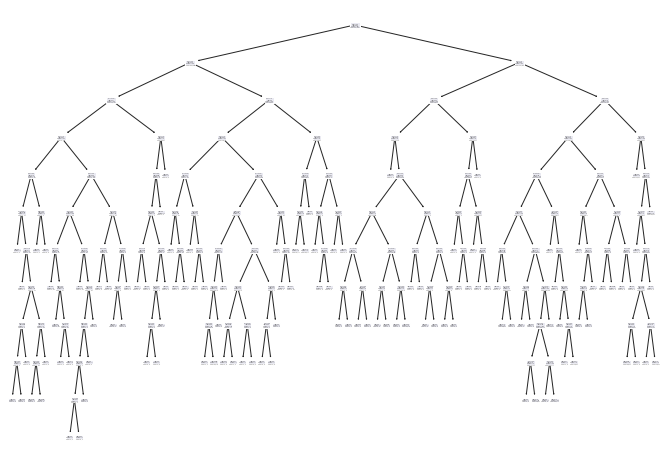

In [88]:
dt = DecisionTreeClassifier()
decision_tree = dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train, Y_train)*100, 2)
print(acc_dt)
plot_tree(decision_tree)

### Random forest

A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.


In [89]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

85.7

### CatBoost

The default optimized objective depends on various conditions:

* Logloss — The target has only two different values or the target_border parameter is not None.
* MultiClass — The target has more than two different values and the border_count parameter is None.

If any features in the cat_features parameter are specified as names instead of indices, feature names must be provided for the training dataset. Therefore, the type of the X parameter in the future calls of the fit function must be either catboost.Pool with defined feature names data or pandas.DataFrame with defined column names.

Default value - None (all features are either considered numerical or of other types if specified precisely)

A one-dimensional array of text columns indices (specified as integers) or names (specified as strings).

Use only if the data parameter is a two-dimensional feature matrix (has one of the following types: list, numpy.ndarray, pandas.DataFrame, pandas.Series).

If any elements in this array are specified as names instead of indices, names for all columns must be provided. To do this, either use the feature_names parameter of this constructor to explicitly specify them or pass a pandas.DataFrame with column names specified in the data parameter.

Default value

None (all features are either considered numerical or of other types if specified precisely)

See Python package training parameters for the full list of parameters

In [90]:
cat_boost = CatBoostClassifier()
cat_boost.fit(X_train, Y_train)
Y_pred = cat_boost.predict(X_test)
acc_cat_boost = round(cat_boost.score(X_train, Y_train)*100, 2)
acc_cat_boost

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 46.7ms	remaining: 46.6s
1:	learn: 0.6798485	total: 47.4ms	remaining: 23.6s
2:	learn: 0.6729520	total: 47.8ms	remaining: 15.9s
3:	learn: 0.6669729	total: 48.3ms	remaining: 12s
4:	learn: 0.6607853	total: 48.7ms	remaining: 9.68s
5:	learn: 0.6554568	total: 49.1ms	remaining: 8.13s
6:	learn: 0.6500727	total: 49.4ms	remaining: 7.01s
7:	learn: 0.6437982	total: 50ms	remaining: 6.2s
8:	learn: 0.6398272	total: 50.8ms	remaining: 5.59s
9:	learn: 0.6351628	total: 51.7ms	remaining: 5.11s
10:	learn: 0.6305969	total: 52.1ms	remaining: 4.68s
11:	learn: 0.6252274	total: 52.6ms	remaining: 4.33s
12:	learn: 0.6203165	total: 53ms	remaining: 4.02s
13:	learn: 0.6163249	total: 53.3ms	remaining: 3.75s
14:	learn: 0.6126752	total: 53.7ms	remaining: 3.52s
15:	learn: 0.6078515	total: 54.1ms	remaining: 3.33s
16:	learn: 0.6033553	total: 54.5ms	remaining: 3.15s
17:	learn: 0.5984437	total: 54.9ms	remaining: 3s
18:	learn: 0.5935188	total: 55.3ms	remaining: 2.86s
19:

298:	learn: 0.3681357	total: 168ms	remaining: 393ms
299:	learn: 0.3679948	total: 168ms	remaining: 393ms
300:	learn: 0.3678870	total: 169ms	remaining: 392ms
301:	learn: 0.3677653	total: 169ms	remaining: 391ms
302:	learn: 0.3676256	total: 170ms	remaining: 390ms
303:	learn: 0.3675480	total: 170ms	remaining: 389ms
304:	learn: 0.3673946	total: 170ms	remaining: 388ms
305:	learn: 0.3672918	total: 171ms	remaining: 388ms
306:	learn: 0.3671779	total: 171ms	remaining: 387ms
307:	learn: 0.3670689	total: 172ms	remaining: 386ms
308:	learn: 0.3669311	total: 172ms	remaining: 385ms
309:	learn: 0.3667767	total: 173ms	remaining: 384ms
310:	learn: 0.3666388	total: 173ms	remaining: 383ms
311:	learn: 0.3665067	total: 173ms	remaining: 383ms
312:	learn: 0.3664033	total: 174ms	remaining: 382ms
313:	learn: 0.3663562	total: 174ms	remaining: 381ms
314:	learn: 0.3662677	total: 175ms	remaining: 380ms
315:	learn: 0.3662569	total: 175ms	remaining: 378ms
316:	learn: 0.3661408	total: 175ms	remaining: 378ms
317:	learn: 

687:	learn: 0.3446728	total: 330ms	remaining: 150ms
688:	learn: 0.3446554	total: 330ms	remaining: 149ms
689:	learn: 0.3445965	total: 331ms	remaining: 149ms
690:	learn: 0.3445448	total: 331ms	remaining: 148ms
691:	learn: 0.3444661	total: 332ms	remaining: 148ms
692:	learn: 0.3444189	total: 332ms	remaining: 147ms
693:	learn: 0.3443896	total: 333ms	remaining: 147ms
694:	learn: 0.3443259	total: 333ms	remaining: 146ms
695:	learn: 0.3442944	total: 334ms	remaining: 146ms
696:	learn: 0.3442509	total: 334ms	remaining: 145ms
697:	learn: 0.3442395	total: 335ms	remaining: 145ms
698:	learn: 0.3441685	total: 335ms	remaining: 144ms
699:	learn: 0.3441189	total: 336ms	remaining: 144ms
700:	learn: 0.3440922	total: 336ms	remaining: 143ms
701:	learn: 0.3440870	total: 336ms	remaining: 143ms
702:	learn: 0.3440379	total: 337ms	remaining: 142ms
703:	learn: 0.3439938	total: 337ms	remaining: 142ms
704:	learn: 0.3439472	total: 338ms	remaining: 141ms
705:	learn: 0.3439393	total: 338ms	remaining: 141ms
706:	learn: 

85.7

## Model evaluation and hyperparameter tuning

Choose model with the highest accuracy.

### Training accuracy

In [91]:
model = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussnb, acc_per,
                                 acc_sgd, acc_linear_svc, acc_dt, acc_cat_boost]})
model.sort_values(by='Score', ascending=False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.79
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,76.73


### K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes

In [92]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)


10

In [93]:
# Create a list with cross validation result for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))
    

/home/nika/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nika/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nika/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nika/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nika/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, inc

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 526us	remaining: 525ms
1:	learn: 0.6803102	total: 1.04ms	remaining: 521ms
2:	learn: 0.6743326	total: 1.58ms	remaining: 524ms
3:	learn: 0.6684760	total: 2.13ms	remaining: 530ms
4:	learn: 0.6624557	total: 2.61ms	remaining: 519ms
5:	learn: 0.6573314	total: 3.1ms	remaining: 514ms
6:	learn: 0.6520748	total: 3.56ms	remaining: 506ms
7:	learn: 0.6460856	total: 4.03ms	remaining: 500ms
8:	learn: 0.6422711	total: 4.39ms	remaining: 483ms
9:	learn: 0.6376840	total: 4.83ms	remaining: 478ms
10:	learn: 0.6326541	total: 5.29ms	remaining: 475ms
11:	learn: 0.6272334	total: 5.75ms	remaining: 473ms
12:	learn: 0.6224744	total: 6.15ms	remaining: 467ms
13:	learn: 0.6175199	total: 6.62ms	remaining: 467ms
14:	learn: 0.6124417	total: 7.1ms	remaining: 466ms
15:	learn: 0.6097890	total: 7.42ms	remaining: 456ms
16:	learn: 0.6050558	total: 7.92ms	remaining: 458ms
17:	learn: 0.6004952	total: 8.46ms	remaining: 462ms
18:	learn: 0.5958639	total: 8.96ms	remaining: 4

411:	learn: 0.3532948	total: 174ms	remaining: 248ms
412:	learn: 0.3532122	total: 174ms	remaining: 248ms
413:	learn: 0.3531823	total: 175ms	remaining: 247ms
414:	learn: 0.3531248	total: 175ms	remaining: 247ms
415:	learn: 0.3530424	total: 176ms	remaining: 247ms
416:	learn: 0.3529508	total: 176ms	remaining: 246ms
417:	learn: 0.3528703	total: 177ms	remaining: 246ms
418:	learn: 0.3528009	total: 177ms	remaining: 245ms
419:	learn: 0.3527983	total: 177ms	remaining: 245ms
420:	learn: 0.3526747	total: 178ms	remaining: 244ms
421:	learn: 0.3525552	total: 178ms	remaining: 244ms
422:	learn: 0.3524764	total: 179ms	remaining: 244ms
423:	learn: 0.3524234	total: 179ms	remaining: 243ms
424:	learn: 0.3523517	total: 179ms	remaining: 243ms
425:	learn: 0.3523133	total: 180ms	remaining: 242ms
426:	learn: 0.3522031	total: 180ms	remaining: 242ms
427:	learn: 0.3520956	total: 181ms	remaining: 241ms
428:	learn: 0.3520106	total: 181ms	remaining: 241ms
429:	learn: 0.3519574	total: 181ms	remaining: 240ms
430:	learn: 

835:	learn: 0.3309056	total: 348ms	remaining: 68.3ms
836:	learn: 0.3308495	total: 349ms	remaining: 67.9ms
837:	learn: 0.3307758	total: 349ms	remaining: 67.5ms
838:	learn: 0.3307287	total: 349ms	remaining: 67.1ms
839:	learn: 0.3306895	total: 350ms	remaining: 66.6ms
840:	learn: 0.3306368	total: 350ms	remaining: 66.3ms
841:	learn: 0.3305893	total: 351ms	remaining: 65.8ms
842:	learn: 0.3305537	total: 351ms	remaining: 65.4ms
843:	learn: 0.3305086	total: 352ms	remaining: 65ms
844:	learn: 0.3304242	total: 352ms	remaining: 64.6ms
845:	learn: 0.3303922	total: 353ms	remaining: 64.2ms
846:	learn: 0.3303395	total: 353ms	remaining: 63.8ms
847:	learn: 0.3303063	total: 353ms	remaining: 63.4ms
848:	learn: 0.3302427	total: 354ms	remaining: 62.9ms
849:	learn: 0.3301644	total: 354ms	remaining: 62.5ms
850:	learn: 0.3301145	total: 355ms	remaining: 62.1ms
851:	learn: 0.3300528	total: 355ms	remaining: 61.7ms
852:	learn: 0.3299663	total: 356ms	remaining: 61.3ms
853:	learn: 0.3298965	total: 356ms	remaining: 60

221:	learn: 0.3821430	total: 88.3ms	remaining: 309ms
222:	learn: 0.3819127	total: 88.7ms	remaining: 309ms
223:	learn: 0.3816053	total: 89.2ms	remaining: 309ms
224:	learn: 0.3813380	total: 89.6ms	remaining: 309ms
225:	learn: 0.3811619	total: 90.1ms	remaining: 308ms
226:	learn: 0.3810310	total: 90.5ms	remaining: 308ms
227:	learn: 0.3807389	total: 91ms	remaining: 308ms
228:	learn: 0.3805727	total: 91.5ms	remaining: 308ms
229:	learn: 0.3803352	total: 91.9ms	remaining: 308ms
230:	learn: 0.3802175	total: 92.4ms	remaining: 307ms
231:	learn: 0.3799781	total: 92.8ms	remaining: 307ms
232:	learn: 0.3797373	total: 93.2ms	remaining: 307ms
233:	learn: 0.3795338	total: 93.6ms	remaining: 307ms
234:	learn: 0.3793260	total: 94.1ms	remaining: 306ms
235:	learn: 0.3792149	total: 94.5ms	remaining: 306ms
236:	learn: 0.3791549	total: 94.9ms	remaining: 305ms
237:	learn: 0.3788937	total: 95.3ms	remaining: 305ms
238:	learn: 0.3787387	total: 95.7ms	remaining: 305ms
239:	learn: 0.3785965	total: 96.1ms	remaining: 3

650:	learn: 0.3459615	total: 263ms	remaining: 141ms
651:	learn: 0.3459356	total: 263ms	remaining: 141ms
652:	learn: 0.3459075	total: 264ms	remaining: 140ms
653:	learn: 0.3458703	total: 264ms	remaining: 140ms
654:	learn: 0.3458142	total: 265ms	remaining: 139ms
655:	learn: 0.3457610	total: 265ms	remaining: 139ms
656:	learn: 0.3456957	total: 265ms	remaining: 138ms
657:	learn: 0.3456579	total: 266ms	remaining: 138ms
658:	learn: 0.3456445	total: 266ms	remaining: 138ms
659:	learn: 0.3456021	total: 266ms	remaining: 137ms
660:	learn: 0.3455747	total: 267ms	remaining: 137ms
661:	learn: 0.3454894	total: 267ms	remaining: 136ms
662:	learn: 0.3454358	total: 268ms	remaining: 136ms
663:	learn: 0.3453743	total: 268ms	remaining: 136ms
664:	learn: 0.3452978	total: 268ms	remaining: 135ms
665:	learn: 0.3452225	total: 269ms	remaining: 135ms
666:	learn: 0.3451973	total: 269ms	remaining: 134ms
667:	learn: 0.3451483	total: 269ms	remaining: 134ms
668:	learn: 0.3450479	total: 270ms	remaining: 134ms
669:	learn: 

28:	learn: 0.5484773	total: 12.1ms	remaining: 405ms
29:	learn: 0.5443739	total: 12.6ms	remaining: 408ms
30:	learn: 0.5408891	total: 13ms	remaining: 407ms
31:	learn: 0.5374815	total: 13.5ms	remaining: 407ms
32:	learn: 0.5349762	total: 13.8ms	remaining: 403ms
33:	learn: 0.5308412	total: 14.2ms	remaining: 403ms
34:	learn: 0.5276993	total: 14.6ms	remaining: 404ms
35:	learn: 0.5242335	total: 15.1ms	remaining: 405ms
36:	learn: 0.5214267	total: 15.5ms	remaining: 405ms
37:	learn: 0.5186447	total: 16ms	remaining: 405ms
38:	learn: 0.5153275	total: 16.4ms	remaining: 404ms
39:	learn: 0.5138959	total: 16.6ms	remaining: 400ms
40:	learn: 0.5104619	total: 17ms	remaining: 399ms
41:	learn: 0.5072055	total: 17.5ms	remaining: 398ms
42:	learn: 0.5045682	total: 17.9ms	remaining: 398ms
43:	learn: 0.5015180	total: 18.3ms	remaining: 398ms
44:	learn: 0.4992157	total: 18.7ms	remaining: 398ms
45:	learn: 0.4968939	total: 19.2ms	remaining: 397ms
46:	learn: 0.4950944	total: 19.4ms	remaining: 394ms
47:	learn: 0.49299

459:	learn: 0.3347374	total: 187ms	remaining: 220ms
460:	learn: 0.3346698	total: 188ms	remaining: 219ms
461:	learn: 0.3345761	total: 188ms	remaining: 219ms
462:	learn: 0.3345109	total: 189ms	remaining: 219ms
463:	learn: 0.3344624	total: 189ms	remaining: 218ms
464:	learn: 0.3344469	total: 189ms	remaining: 218ms
465:	learn: 0.3343491	total: 190ms	remaining: 218ms
466:	learn: 0.3342673	total: 190ms	remaining: 217ms
467:	learn: 0.3341897	total: 191ms	remaining: 217ms
468:	learn: 0.3340785	total: 191ms	remaining: 217ms
469:	learn: 0.3339828	total: 192ms	remaining: 216ms
470:	learn: 0.3339729	total: 192ms	remaining: 216ms
471:	learn: 0.3339685	total: 192ms	remaining: 215ms
472:	learn: 0.3339086	total: 193ms	remaining: 215ms
473:	learn: 0.3338303	total: 193ms	remaining: 214ms
474:	learn: 0.3337541	total: 194ms	remaining: 214ms
475:	learn: 0.3337211	total: 194ms	remaining: 214ms
476:	learn: 0.3336524	total: 194ms	remaining: 213ms
477:	learn: 0.3336245	total: 195ms	remaining: 213ms
478:	learn: 

844:	learn: 0.3160776	total: 361ms	remaining: 66.2ms
845:	learn: 0.3160388	total: 362ms	remaining: 65.8ms
846:	learn: 0.3159981	total: 362ms	remaining: 65.4ms
847:	learn: 0.3159488	total: 363ms	remaining: 65ms
848:	learn: 0.3159230	total: 363ms	remaining: 64.6ms
849:	learn: 0.3158954	total: 364ms	remaining: 64.2ms
850:	learn: 0.3158532	total: 364ms	remaining: 63.8ms
851:	learn: 0.3158298	total: 365ms	remaining: 63.3ms
852:	learn: 0.3158090	total: 365ms	remaining: 62.9ms
853:	learn: 0.3157751	total: 365ms	remaining: 62.5ms
854:	learn: 0.3157426	total: 366ms	remaining: 62ms
855:	learn: 0.3157197	total: 366ms	remaining: 61.6ms
856:	learn: 0.3156839	total: 367ms	remaining: 61.2ms
857:	learn: 0.3156228	total: 367ms	remaining: 60.8ms
858:	learn: 0.3155909	total: 368ms	remaining: 60.4ms
859:	learn: 0.3155288	total: 368ms	remaining: 60ms
860:	learn: 0.3155020	total: 369ms	remaining: 59.5ms
861:	learn: 0.3154613	total: 369ms	remaining: 59.1ms
862:	learn: 0.3154491	total: 370ms	remaining: 58.7ms

176:	learn: 0.3920377	total: 85.8ms	remaining: 399ms
177:	learn: 0.3918096	total: 86.3ms	remaining: 399ms
178:	learn: 0.3915366	total: 86.8ms	remaining: 398ms
179:	learn: 0.3913638	total: 87.3ms	remaining: 398ms
180:	learn: 0.3910589	total: 87.8ms	remaining: 397ms
181:	learn: 0.3907630	total: 88.3ms	remaining: 397ms
182:	learn: 0.3905240	total: 88.8ms	remaining: 396ms
183:	learn: 0.3903106	total: 89.9ms	remaining: 399ms
184:	learn: 0.3902877	total: 90.4ms	remaining: 398ms
185:	learn: 0.3899521	total: 91ms	remaining: 398ms
186:	learn: 0.3897422	total: 91.4ms	remaining: 397ms
187:	learn: 0.3894546	total: 91.9ms	remaining: 397ms
188:	learn: 0.3891523	total: 92.5ms	remaining: 397ms
189:	learn: 0.3888969	total: 92.9ms	remaining: 396ms
190:	learn: 0.3886019	total: 93.4ms	remaining: 395ms
191:	learn: 0.3885238	total: 93.7ms	remaining: 394ms
192:	learn: 0.3882374	total: 94.1ms	remaining: 394ms
193:	learn: 0.3879784	total: 94.8ms	remaining: 394ms
194:	learn: 0.3877516	total: 95.2ms	remaining: 3

590:	learn: 0.3504977	total: 260ms	remaining: 180ms
591:	learn: 0.3503989	total: 261ms	remaining: 180ms
592:	learn: 0.3503124	total: 261ms	remaining: 179ms
593:	learn: 0.3502265	total: 262ms	remaining: 179ms
594:	learn: 0.3502239	total: 262ms	remaining: 178ms
595:	learn: 0.3501293	total: 263ms	remaining: 178ms
596:	learn: 0.3500803	total: 263ms	remaining: 177ms
597:	learn: 0.3500484	total: 263ms	remaining: 177ms
598:	learn: 0.3499982	total: 264ms	remaining: 177ms
599:	learn: 0.3499764	total: 264ms	remaining: 176ms
600:	learn: 0.3498954	total: 265ms	remaining: 176ms
601:	learn: 0.3498683	total: 265ms	remaining: 175ms
602:	learn: 0.3498683	total: 265ms	remaining: 175ms
603:	learn: 0.3498140	total: 266ms	remaining: 174ms
604:	learn: 0.3497554	total: 266ms	remaining: 174ms
605:	learn: 0.3497045	total: 267ms	remaining: 173ms
606:	learn: 0.3496518	total: 267ms	remaining: 173ms
607:	learn: 0.3495944	total: 268ms	remaining: 173ms
608:	learn: 0.3495109	total: 268ms	remaining: 172ms
609:	learn: 

996:	learn: 0.3332150	total: 434ms	remaining: 1.31ms
997:	learn: 0.3331704	total: 435ms	remaining: 871us
998:	learn: 0.3331469	total: 435ms	remaining: 435us
999:	learn: 0.3331472	total: 436ms	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6880639	total: 416us	remaining: 416ms
1:	learn: 0.6823125	total: 882us	remaining: 440ms
2:	learn: 0.6762136	total: 1.34ms	remaining: 444ms
3:	learn: 0.6702588	total: 1.82ms	remaining: 452ms
4:	learn: 0.6641973	total: 2.25ms	remaining: 448ms
5:	learn: 0.6590351	total: 2.67ms	remaining: 442ms
6:	learn: 0.6544787	total: 3.1ms	remaining: 440ms
7:	learn: 0.6485151	total: 3.61ms	remaining: 447ms
8:	learn: 0.6445425	total: 3.96ms	remaining: 436ms
9:	learn: 0.6395038	total: 4.4ms	remaining: 436ms
10:	learn: 0.6345487	total: 4.83ms	remaining: 434ms
11:	learn: 0.6308477	total: 5.26ms	remaining: 433ms
12:	learn: 0.6255599	total: 5.67ms	remaining: 430ms
13:	learn: 0.6214324	total: 6ms	remaining: 423ms
14:	learn: 0.6166108	total: 6.39ms	remaining: 419ms


378:	learn: 0.3640162	total: 156ms	remaining: 255ms
379:	learn: 0.3640057	total: 156ms	remaining: 255ms
380:	learn: 0.3639249	total: 157ms	remaining: 255ms
381:	learn: 0.3638230	total: 157ms	remaining: 255ms
382:	learn: 0.3637287	total: 158ms	remaining: 254ms
383:	learn: 0.3635981	total: 158ms	remaining: 254ms
384:	learn: 0.3634993	total: 159ms	remaining: 254ms
385:	learn: 0.3634445	total: 159ms	remaining: 253ms
386:	learn: 0.3633478	total: 160ms	remaining: 253ms
387:	learn: 0.3632655	total: 160ms	remaining: 253ms
388:	learn: 0.3631824	total: 161ms	remaining: 253ms
389:	learn: 0.3631139	total: 161ms	remaining: 252ms
390:	learn: 0.3630432	total: 162ms	remaining: 252ms
391:	learn: 0.3628945	total: 162ms	remaining: 251ms
392:	learn: 0.3627408	total: 162ms	remaining: 251ms
393:	learn: 0.3626955	total: 163ms	remaining: 251ms
394:	learn: 0.3626419	total: 163ms	remaining: 250ms
395:	learn: 0.3626413	total: 164ms	remaining: 250ms
396:	learn: 0.3625637	total: 164ms	remaining: 249ms
397:	learn: 

792:	learn: 0.3414415	total: 330ms	remaining: 86.2ms
793:	learn: 0.3413644	total: 331ms	remaining: 85.8ms
794:	learn: 0.3413109	total: 331ms	remaining: 85.4ms
795:	learn: 0.3412456	total: 332ms	remaining: 85ms
796:	learn: 0.3412150	total: 332ms	remaining: 84.6ms
797:	learn: 0.3412120	total: 333ms	remaining: 84.2ms
798:	learn: 0.3411732	total: 333ms	remaining: 83.8ms
799:	learn: 0.3411235	total: 334ms	remaining: 83.4ms
800:	learn: 0.3410934	total: 334ms	remaining: 83ms
801:	learn: 0.3410583	total: 334ms	remaining: 82.6ms
802:	learn: 0.3410008	total: 335ms	remaining: 82.2ms
803:	learn: 0.3409589	total: 335ms	remaining: 81.8ms
804:	learn: 0.3409433	total: 336ms	remaining: 81.3ms
805:	learn: 0.3409428	total: 336ms	remaining: 80.9ms
806:	learn: 0.3408839	total: 337ms	remaining: 80.5ms
807:	learn: 0.3408624	total: 337ms	remaining: 80.1ms
808:	learn: 0.3407892	total: 337ms	remaining: 79.7ms
809:	learn: 0.3407618	total: 338ms	remaining: 79.3ms
810:	learn: 0.3407409	total: 338ms	remaining: 78.8

78:	learn: 0.4543298	total: 54.5ms	remaining: 635ms
79:	learn: 0.4533074	total: 55ms	remaining: 633ms
80:	learn: 0.4524480	total: 55.4ms	remaining: 628ms
81:	learn: 0.4511711	total: 55.9ms	remaining: 626ms
82:	learn: 0.4499118	total: 56.4ms	remaining: 623ms
83:	learn: 0.4490038	total: 56.8ms	remaining: 620ms
84:	learn: 0.4482136	total: 57.3ms	remaining: 617ms
85:	learn: 0.4471623	total: 57.7ms	remaining: 613ms
86:	learn: 0.4459128	total: 58.2ms	remaining: 611ms
87:	learn: 0.4450933	total: 58.7ms	remaining: 608ms
88:	learn: 0.4436897	total: 59.2ms	remaining: 606ms
89:	learn: 0.4426953	total: 59.8ms	remaining: 604ms
90:	learn: 0.4418374	total: 60.2ms	remaining: 602ms
91:	learn: 0.4406746	total: 60.8ms	remaining: 600ms
92:	learn: 0.4396858	total: 61.3ms	remaining: 598ms
93:	learn: 0.4384034	total: 61.9ms	remaining: 596ms
94:	learn: 0.4370674	total: 62.5ms	remaining: 596ms
95:	learn: 0.4357672	total: 63.1ms	remaining: 594ms
96:	learn: 0.4347867	total: 63.7ms	remaining: 593ms
97:	learn: 0.4

418:	learn: 0.3583035	total: 227ms	remaining: 314ms
419:	learn: 0.3581973	total: 227ms	remaining: 314ms
420:	learn: 0.3581769	total: 228ms	remaining: 313ms
421:	learn: 0.3580603	total: 228ms	remaining: 312ms
422:	learn: 0.3580463	total: 228ms	remaining: 312ms
423:	learn: 0.3579553	total: 229ms	remaining: 311ms
424:	learn: 0.3579384	total: 229ms	remaining: 310ms
425:	learn: 0.3578408	total: 230ms	remaining: 310ms
426:	learn: 0.3577991	total: 230ms	remaining: 309ms
427:	learn: 0.3577453	total: 231ms	remaining: 308ms
428:	learn: 0.3577067	total: 231ms	remaining: 307ms
429:	learn: 0.3576475	total: 231ms	remaining: 307ms
430:	learn: 0.3575404	total: 232ms	remaining: 306ms
431:	learn: 0.3574664	total: 232ms	remaining: 305ms
432:	learn: 0.3574520	total: 233ms	remaining: 305ms
433:	learn: 0.3573820	total: 233ms	remaining: 304ms
434:	learn: 0.3573559	total: 233ms	remaining: 303ms
435:	learn: 0.3572676	total: 234ms	remaining: 302ms
436:	learn: 0.3572142	total: 234ms	remaining: 302ms
437:	learn: 

834:	learn: 0.3393987	total: 401ms	remaining: 79.3ms
835:	learn: 0.3393582	total: 402ms	remaining: 78.8ms
836:	learn: 0.3392906	total: 403ms	remaining: 78.4ms
837:	learn: 0.3392473	total: 403ms	remaining: 77.9ms
838:	learn: 0.3391875	total: 404ms	remaining: 77.4ms
839:	learn: 0.3391699	total: 404ms	remaining: 77ms
840:	learn: 0.3391377	total: 405ms	remaining: 76.5ms
841:	learn: 0.3390933	total: 405ms	remaining: 76ms
842:	learn: 0.3390692	total: 405ms	remaining: 75.5ms
843:	learn: 0.3390339	total: 406ms	remaining: 75ms
844:	learn: 0.3389914	total: 406ms	remaining: 74.5ms
845:	learn: 0.3389823	total: 407ms	remaining: 74ms
846:	learn: 0.3389225	total: 407ms	remaining: 73.5ms
847:	learn: 0.3388882	total: 407ms	remaining: 73ms
848:	learn: 0.3388165	total: 408ms	remaining: 72.6ms
849:	learn: 0.3387631	total: 408ms	remaining: 72.1ms
850:	learn: 0.3387126	total: 409ms	remaining: 71.6ms
851:	learn: 0.3386854	total: 409ms	remaining: 71.1ms
852:	learn: 0.3386462	total: 410ms	remaining: 70.6ms
853

199:	learn: 0.3815439	total: 85.2ms	remaining: 341ms
200:	learn: 0.3813627	total: 85.8ms	remaining: 341ms
201:	learn: 0.3811255	total: 86.4ms	remaining: 341ms
202:	learn: 0.3808890	total: 86.9ms	remaining: 341ms
203:	learn: 0.3805948	total: 87.7ms	remaining: 342ms
204:	learn: 0.3803574	total: 88.2ms	remaining: 342ms
205:	learn: 0.3801033	total: 88.7ms	remaining: 342ms
206:	learn: 0.3798787	total: 89.2ms	remaining: 342ms
207:	learn: 0.3795715	total: 89.7ms	remaining: 342ms
208:	learn: 0.3793251	total: 90.2ms	remaining: 341ms
209:	learn: 0.3792319	total: 90.6ms	remaining: 341ms
210:	learn: 0.3789948	total: 91.1ms	remaining: 341ms
211:	learn: 0.3786939	total: 91.6ms	remaining: 340ms
212:	learn: 0.3785479	total: 92ms	remaining: 340ms
213:	learn: 0.3783145	total: 92.5ms	remaining: 340ms
214:	learn: 0.3780559	total: 93ms	remaining: 339ms
215:	learn: 0.3777650	total: 93.4ms	remaining: 339ms
216:	learn: 0.3777087	total: 93.8ms	remaining: 338ms
217:	learn: 0.3775376	total: 94.2ms	remaining: 338

547:	learn: 0.3466243	total: 261ms	remaining: 215ms
548:	learn: 0.3466129	total: 261ms	remaining: 215ms
549:	learn: 0.3465422	total: 262ms	remaining: 214ms
550:	learn: 0.3464955	total: 263ms	remaining: 214ms
551:	learn: 0.3464748	total: 263ms	remaining: 214ms
552:	learn: 0.3464458	total: 264ms	remaining: 213ms
553:	learn: 0.3463907	total: 264ms	remaining: 213ms
554:	learn: 0.3463230	total: 264ms	remaining: 212ms
555:	learn: 0.3462605	total: 265ms	remaining: 212ms
556:	learn: 0.3461496	total: 265ms	remaining: 211ms
557:	learn: 0.3460936	total: 266ms	remaining: 211ms
558:	learn: 0.3460478	total: 266ms	remaining: 210ms
559:	learn: 0.3459732	total: 267ms	remaining: 210ms
560:	learn: 0.3459334	total: 267ms	remaining: 209ms
561:	learn: 0.3458775	total: 268ms	remaining: 209ms
562:	learn: 0.3457729	total: 268ms	remaining: 208ms
563:	learn: 0.3456934	total: 268ms	remaining: 208ms
564:	learn: 0.3456376	total: 269ms	remaining: 207ms
565:	learn: 0.3456010	total: 269ms	remaining: 207ms
566:	learn: 

949:	learn: 0.3290184	total: 435ms	remaining: 22.9ms
950:	learn: 0.3289630	total: 436ms	remaining: 22.4ms
951:	learn: 0.3289152	total: 436ms	remaining: 22ms
952:	learn: 0.3288577	total: 436ms	remaining: 21.5ms
953:	learn: 0.3288308	total: 437ms	remaining: 21.1ms
954:	learn: 0.3288096	total: 437ms	remaining: 20.6ms
955:	learn: 0.3287777	total: 438ms	remaining: 20.1ms
956:	learn: 0.3287388	total: 438ms	remaining: 19.7ms
957:	learn: 0.3287113	total: 439ms	remaining: 19.2ms
958:	learn: 0.3286841	total: 439ms	remaining: 18.8ms
959:	learn: 0.3286524	total: 440ms	remaining: 18.3ms
960:	learn: 0.3285981	total: 440ms	remaining: 17.9ms
961:	learn: 0.3285880	total: 441ms	remaining: 17.4ms
962:	learn: 0.3285610	total: 441ms	remaining: 16.9ms
963:	learn: 0.3285143	total: 441ms	remaining: 16.5ms
964:	learn: 0.3284912	total: 442ms	remaining: 16ms
965:	learn: 0.3284427	total: 442ms	remaining: 15.6ms
966:	learn: 0.3284105	total: 443ms	remaining: 15.1ms
967:	learn: 0.3283749	total: 443ms	remaining: 14.7

252:	learn: 0.3738124	total: 136ms	remaining: 401ms
253:	learn: 0.3737406	total: 136ms	remaining: 401ms
254:	learn: 0.3736203	total: 137ms	remaining: 400ms
255:	learn: 0.3734863	total: 138ms	remaining: 400ms
256:	learn: 0.3733601	total: 138ms	remaining: 399ms
257:	learn: 0.3731603	total: 139ms	remaining: 399ms
258:	learn: 0.3730495	total: 139ms	remaining: 398ms
259:	learn: 0.3728601	total: 140ms	remaining: 397ms
260:	learn: 0.3727408	total: 140ms	remaining: 396ms
261:	learn: 0.3726020	total: 140ms	remaining: 396ms
262:	learn: 0.3725460	total: 141ms	remaining: 395ms
263:	learn: 0.3723630	total: 141ms	remaining: 394ms
264:	learn: 0.3723504	total: 143ms	remaining: 398ms
265:	learn: 0.3722104	total: 144ms	remaining: 397ms
266:	learn: 0.3720501	total: 144ms	remaining: 397ms
267:	learn: 0.3720313	total: 145ms	remaining: 396ms
268:	learn: 0.3719668	total: 145ms	remaining: 395ms
269:	learn: 0.3717892	total: 147ms	remaining: 398ms
270:	learn: 0.3716393	total: 148ms	remaining: 399ms
271:	learn: 

577:	learn: 0.3483168	total: 307ms	remaining: 224ms
578:	learn: 0.3482895	total: 308ms	remaining: 224ms
579:	learn: 0.3482392	total: 309ms	remaining: 223ms
580:	learn: 0.3481842	total: 309ms	remaining: 223ms
581:	learn: 0.3481614	total: 310ms	remaining: 223ms
582:	learn: 0.3480566	total: 310ms	remaining: 222ms
583:	learn: 0.3479464	total: 311ms	remaining: 222ms
584:	learn: 0.3478863	total: 312ms	remaining: 221ms
585:	learn: 0.3478313	total: 312ms	remaining: 220ms
586:	learn: 0.3477467	total: 313ms	remaining: 220ms
587:	learn: 0.3477261	total: 313ms	remaining: 219ms
588:	learn: 0.3477261	total: 313ms	remaining: 219ms
589:	learn: 0.3476570	total: 314ms	remaining: 218ms
590:	learn: 0.3476264	total: 314ms	remaining: 217ms
591:	learn: 0.3475683	total: 315ms	remaining: 217ms
592:	learn: 0.3474705	total: 315ms	remaining: 216ms
593:	learn: 0.3474001	total: 315ms	remaining: 216ms
594:	learn: 0.3473112	total: 316ms	remaining: 215ms
595:	learn: 0.3473051	total: 316ms	remaining: 214ms
596:	learn: 

983:	learn: 0.3309392	total: 484ms	remaining: 7.87ms
984:	learn: 0.3309078	total: 485ms	remaining: 7.38ms
985:	learn: 0.3308796	total: 485ms	remaining: 6.89ms
986:	learn: 0.3308500	total: 486ms	remaining: 6.4ms
987:	learn: 0.3308209	total: 486ms	remaining: 5.9ms
988:	learn: 0.3307803	total: 487ms	remaining: 5.41ms
989:	learn: 0.3307476	total: 487ms	remaining: 4.92ms
990:	learn: 0.3307138	total: 487ms	remaining: 4.43ms
991:	learn: 0.3306907	total: 488ms	remaining: 3.93ms
992:	learn: 0.3306604	total: 488ms	remaining: 3.44ms
993:	learn: 0.3306158	total: 489ms	remaining: 2.95ms
994:	learn: 0.3305884	total: 489ms	remaining: 2.46ms
995:	learn: 0.3305563	total: 490ms	remaining: 1.97ms
996:	learn: 0.3305263	total: 490ms	remaining: 1.47ms
997:	learn: 0.3304994	total: 490ms	remaining: 982us
998:	learn: 0.3304552	total: 491ms	remaining: 491us
999:	learn: 0.3304275	total: 491ms	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6872024	total: 457us	remaining: 457ms
1:	learn: 0.6814878	total:

298:	learn: 0.3764328	total: 145ms	remaining: 340ms
299:	learn: 0.3762774	total: 146ms	remaining: 340ms
300:	learn: 0.3762548	total: 146ms	remaining: 339ms
301:	learn: 0.3760866	total: 147ms	remaining: 339ms
302:	learn: 0.3759912	total: 147ms	remaining: 339ms
303:	learn: 0.3758304	total: 148ms	remaining: 339ms
304:	learn: 0.3757637	total: 149ms	remaining: 338ms
305:	learn: 0.3757443	total: 149ms	remaining: 338ms
306:	learn: 0.3756273	total: 149ms	remaining: 337ms
307:	learn: 0.3754493	total: 150ms	remaining: 337ms
308:	learn: 0.3753506	total: 150ms	remaining: 336ms
309:	learn: 0.3753249	total: 151ms	remaining: 336ms
310:	learn: 0.3751643	total: 151ms	remaining: 335ms
311:	learn: 0.3751441	total: 152ms	remaining: 334ms
312:	learn: 0.3750480	total: 152ms	remaining: 334ms
313:	learn: 0.3748807	total: 153ms	remaining: 334ms
314:	learn: 0.3748737	total: 153ms	remaining: 333ms
315:	learn: 0.3748535	total: 154ms	remaining: 333ms
316:	learn: 0.3747512	total: 154ms	remaining: 333ms
317:	learn: 

604:	learn: 0.3551848	total: 314ms	remaining: 205ms
605:	learn: 0.3551475	total: 314ms	remaining: 204ms
606:	learn: 0.3551059	total: 315ms	remaining: 204ms
607:	learn: 0.3550643	total: 316ms	remaining: 203ms
608:	learn: 0.3550309	total: 316ms	remaining: 203ms
609:	learn: 0.3549979	total: 317ms	remaining: 203ms
610:	learn: 0.3549697	total: 317ms	remaining: 202ms
611:	learn: 0.3549610	total: 318ms	remaining: 202ms
612:	learn: 0.3549183	total: 318ms	remaining: 201ms
613:	learn: 0.3548528	total: 319ms	remaining: 201ms
614:	learn: 0.3548175	total: 320ms	remaining: 200ms
615:	learn: 0.3547928	total: 321ms	remaining: 200ms
616:	learn: 0.3547785	total: 321ms	remaining: 199ms
617:	learn: 0.3547499	total: 322ms	remaining: 199ms
618:	learn: 0.3546726	total: 322ms	remaining: 198ms
619:	learn: 0.3546358	total: 323ms	remaining: 198ms
620:	learn: 0.3546139	total: 323ms	remaining: 197ms
621:	learn: 0.3545615	total: 324ms	remaining: 197ms
622:	learn: 0.3545080	total: 325ms	remaining: 196ms
623:	learn: 

901:	learn: 0.3419494	total: 485ms	remaining: 52.7ms
902:	learn: 0.3418915	total: 486ms	remaining: 52.2ms
903:	learn: 0.3418420	total: 486ms	remaining: 51.7ms
904:	learn: 0.3418107	total: 487ms	remaining: 51.1ms
905:	learn: 0.3417882	total: 488ms	remaining: 50.6ms
906:	learn: 0.3417403	total: 488ms	remaining: 50.1ms
907:	learn: 0.3416880	total: 489ms	remaining: 49.5ms
908:	learn: 0.3416515	total: 489ms	remaining: 49ms
909:	learn: 0.3415978	total: 490ms	remaining: 48.5ms
910:	learn: 0.3415103	total: 491ms	remaining: 48ms
911:	learn: 0.3414944	total: 491ms	remaining: 47.4ms
912:	learn: 0.3414632	total: 492ms	remaining: 46.9ms
913:	learn: 0.3414419	total: 492ms	remaining: 46.3ms
914:	learn: 0.3414046	total: 493ms	remaining: 45.8ms
915:	learn: 0.3413815	total: 493ms	remaining: 45.2ms
916:	learn: 0.3413316	total: 494ms	remaining: 44.7ms
917:	learn: 0.3413077	total: 494ms	remaining: 44.1ms
918:	learn: 0.3412736	total: 495ms	remaining: 43.6ms
919:	learn: 0.3412511	total: 495ms	remaining: 43.1

105:	learn: 0.4308238	total: 71.2ms	remaining: 600ms
106:	learn: 0.4299864	total: 71.8ms	remaining: 600ms
107:	learn: 0.4290411	total: 72.4ms	remaining: 598ms
108:	learn: 0.4281777	total: 73.7ms	remaining: 602ms
109:	learn: 0.4273320	total: 74.4ms	remaining: 602ms
110:	learn: 0.4270097	total: 75ms	remaining: 600ms
111:	learn: 0.4264137	total: 75.6ms	remaining: 600ms
112:	learn: 0.4255993	total: 76.3ms	remaining: 599ms
113:	learn: 0.4249924	total: 76.9ms	remaining: 598ms
114:	learn: 0.4243160	total: 77.5ms	remaining: 597ms
115:	learn: 0.4234847	total: 78.2ms	remaining: 596ms
116:	learn: 0.4231699	total: 78.7ms	remaining: 594ms
117:	learn: 0.4227556	total: 79.2ms	remaining: 592ms
118:	learn: 0.4220635	total: 79.9ms	remaining: 591ms
119:	learn: 0.4214770	total: 81ms	remaining: 594ms
120:	learn: 0.4207993	total: 81.7ms	remaining: 593ms
121:	learn: 0.4199507	total: 82.3ms	remaining: 592ms
122:	learn: 0.4190744	total: 83ms	remaining: 592ms
123:	learn: 0.4185661	total: 83.7ms	remaining: 591ms

398:	learn: 0.3635377	total: 241ms	remaining: 363ms
399:	learn: 0.3635334	total: 242ms	remaining: 363ms
400:	learn: 0.3634834	total: 242ms	remaining: 362ms
401:	learn: 0.3633897	total: 243ms	remaining: 361ms
402:	learn: 0.3632668	total: 244ms	remaining: 361ms
403:	learn: 0.3631323	total: 244ms	remaining: 360ms
404:	learn: 0.3630393	total: 245ms	remaining: 360ms
405:	learn: 0.3629757	total: 245ms	remaining: 359ms
406:	learn: 0.3628977	total: 246ms	remaining: 358ms
407:	learn: 0.3627918	total: 246ms	remaining: 357ms
408:	learn: 0.3627387	total: 247ms	remaining: 356ms
409:	learn: 0.3627032	total: 247ms	remaining: 356ms
410:	learn: 0.3626887	total: 247ms	remaining: 355ms
411:	learn: 0.3626003	total: 248ms	remaining: 354ms
412:	learn: 0.3625381	total: 248ms	remaining: 353ms
413:	learn: 0.3624327	total: 249ms	remaining: 352ms
414:	learn: 0.3623992	total: 250ms	remaining: 352ms
415:	learn: 0.3623850	total: 250ms	remaining: 351ms
416:	learn: 0.3623223	total: 250ms	remaining: 350ms
417:	learn: 

732:	learn: 0.3455448	total: 414ms	remaining: 151ms
733:	learn: 0.3454727	total: 414ms	remaining: 150ms
734:	learn: 0.3454293	total: 415ms	remaining: 150ms
735:	learn: 0.3454013	total: 415ms	remaining: 149ms
736:	learn: 0.3453907	total: 416ms	remaining: 148ms
737:	learn: 0.3453307	total: 416ms	remaining: 148ms
738:	learn: 0.3452982	total: 417ms	remaining: 147ms
739:	learn: 0.3452695	total: 417ms	remaining: 146ms
740:	learn: 0.3452163	total: 417ms	remaining: 146ms
741:	learn: 0.3451368	total: 418ms	remaining: 145ms
742:	learn: 0.3450589	total: 418ms	remaining: 145ms
743:	learn: 0.3450166	total: 419ms	remaining: 144ms
744:	learn: 0.3449708	total: 419ms	remaining: 143ms
745:	learn: 0.3449072	total: 420ms	remaining: 143ms
746:	learn: 0.3448447	total: 420ms	remaining: 142ms
747:	learn: 0.3447817	total: 420ms	remaining: 142ms
748:	learn: 0.3447559	total: 421ms	remaining: 141ms
749:	learn: 0.3447100	total: 421ms	remaining: 140ms
750:	learn: 0.3446764	total: 422ms	remaining: 140ms
751:	learn: 

In [94]:
# Mean and standard deviation of cross validation results for each classifier

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [95]:
cv_res = pd.DataFrame({
    'Cross Validation Mean': cv_mean, 
    'Cross Validation Std': cv_std, 
    'Algorithm': 
    ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']
})

cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)


,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.815028,0.036378,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803677,0.027929,Random Forest
4,0.803664,0.042356,KNN
5,0.800243,0.033294,Linear SVC
6,0.788904,0.025236,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.782150,0.043968,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

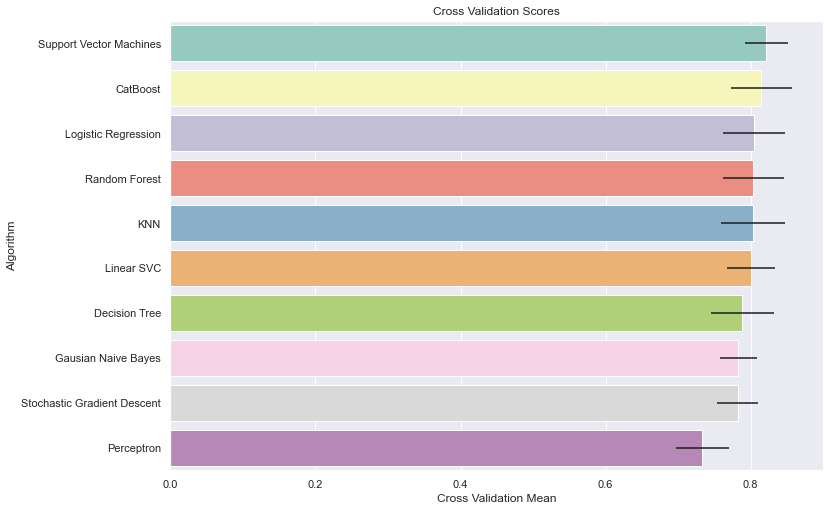

In [96]:
sns.barplot(x = 'Cross Validation Mean', y = 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

Support Vector Machines is the highest cross validation support. We will procceed with this model.

### Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. I will tune the parameters of support vector classifier using GridSearchCV.

In [97]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [98]:
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [99]:
# Training accuracy

svc = SVC(C=100, gamma = 0.01, kernel='rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.54

In [100]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv=10).mean()

# NOTE: mean cross validation score imoived slighyly

0.8297242083758938

In [101]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
len(Y_pred)

418

# 7. Preparing data for submission

In [103]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [104]:
gs.shape

(418, 2)

In [105]:
# create submition dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1
...,...,...
1294,1305,0
1295,1306,1
1296,1307,0
1297,1308,0


In [106]:
submit.shape

(418, 2)

In [107]:
# Create and save csv file
submit.to_csv('submit_svm_titanic.csv', index = False)